The dimensions of the dataset (18, 2)
0                      I love this sandwich
1                  This is an amazing place
2        I feel very good about these beers
3                      This is my best work
4                      What an awesome view
5             I do not like this restaurant
6                  I am tired of this stuff
7                    I can't deal with this
8                      He is my sworn enemy
9                       My boss is horrible
10                 This is an awesome place
11    I do not like the taste of this juice
12                          I love to dance
13        I am sick and tired of this place
14                     What a great holiday
15           That is a bad locality to stay
16           We will have good fun tomorrow
17         I went to my enemy's house today
Name: message, dtype: object
0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17   

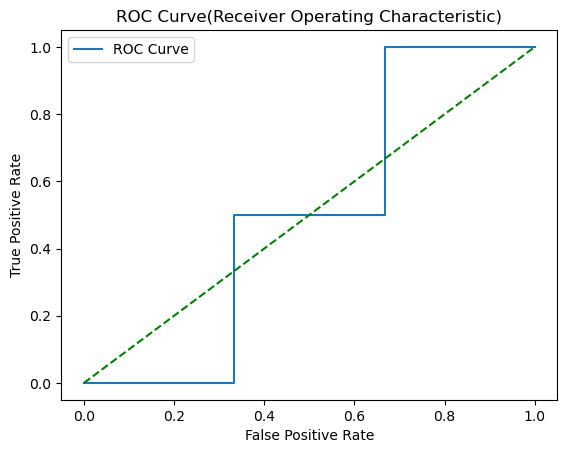

AUC Score: 0.5


In [8]:
import pandas as pd 
msg=pd.read_csv('naive_dataset.csv',names=['message', 'label']) 
print('The dimensions of the dataset',msg.shape) 
# Clean up whitespace 
msg['message'] = msg['message'].str.strip() 
msg['label'] = msg['label'].str.strip() 
msg['labelnum']=msg.label.map({'pos': 1,'neg':0}) 
x=msg.message 
y=msg.labelnum 
print(x) 
print(y) 
#splitting the dataset into train and test data 
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y) 
print(xtest.shape) 
print(xtrain.shape) 
print(ytest.shape) 
print(ytrain.shape) 
#output of count vectoriser is a sparse matrix 
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer() 
xtrain_dtm = count_vect.fit_transform(xtrain) 
xtest_dtm=count_vect.transform(xtest) 
print(count_vect.get_feature_names_out()) 
df= pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names_out()) 
print(df)#tabular representation 
print(xtrain_dtm) #sparse matrix representation 
# Training Naive Bayes (NB) classifier on training data. 
from sklearn.naive_bayes import MultinomialNB 
clf = MultinomialNB().fit(xtrain_dtm,ytrain) 
predicted = clf.predict(xtest_dtm) 
#printing accuracy metrics 
from sklearn import metrics 
print('Confusion matrix') 
print(metrics.confusion_matrix(ytest,predicted)) 
print('Accuracy metrics') 
print('Accuracy of the classifer is',metrics.accuracy_score(ytest,predicted)*100) 
print('Recall and Precison') 
print(metrics.recall_score(ytest,predicted)) 
print(metrics.precision_score(ytest,predicted)) 
#ROC Curve: ROC AUC is a performance metric that shows how well a model separates positive and negative classes, using different threshold values. 
from sklearn.metrics import roc_curve, roc_auc_score 
import matplotlib.pyplot as plt 
# Get predicted probabilities for positive class 
y_prob = clf.predict_proba(xtest_dtm)[:, 1] 
# Calculate False Positive Rate and True Positive Rate 
fpr, tpr, _ = roc_curve(ytest, y_prob) 
# Plotting the ROC curve 
plt.plot(fpr, tpr, label='ROC Curve') 
plt.plot([0, 1], [0, 1], 'g--') # dashed diagonalin ROC curve 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve(Receiver Operating Characteristic)') 
plt.legend() 
plt.show() 
# Printing AUC score 
print("AUC Score:", roc_auc_score(ytest, y_prob)) 
